# Lab 02: Nonlinear Regression and Overfitting

In Lab 01, we explored the construction of linear regression models. Recall the assumptions we make in linear regression:
- $\textbf{x} \in {\cal X} = \mathbb{R}^n$
- $y \in {\cal Y} = \mathbb{R}$
- The $\textbf{x}$ data are drawn i.i.d. from some (unknown) distribution over ${\cal X}$
- There is a linear relationship between $\textbf{x}$ and $y$ with additive constant-variance Gaussian noise, i.e., $y \sim {\cal N}(\theta^\top \textbf{x}, \sigma^2)$,
  where $\theta \in \mathbb{R}^{n+1}$ is unknown and $\textbf{x}$ is an $n+1$-dimensional vector augemented with a constant value of 1 as its first element.

Today, we consider what we might do when the fourth assumption, linearity, does not hold. We introduce a particular form of nonlinear regression,
*polynomial regression*, in which we account for nonlinear relationships between $\mathbf{x}$ and $y$ by performing nonlinear transformations of
the input variables in $\mathbf{x}$.

As an example, if we had a single input variable $x$, linear regression gives us the hypothesis
$$h_\theta(x) = \theta_0 + \theta_1 x .$$
We can add a new "variable" $x^2$, which is a nonlinear transformation of the input $x$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 .$$
The important thing to notice here is that although the hypothesis is *nonlinear* in $x$, allowing us to model a more complex function than
ordinary linear regression, the hypothesis is *linear* in $\theta$, allowing us to use the normal equations to find the optimal $\theta$ as before.

## Polynomial Regression

More generally, polynomial regession is a form of linear regression in which the relationship between the independent variables $\mathbf{x}$ and the dependent
variable $y$ is modelled as a polynomial.

For a single input $x$, the hypothesis in a polynomial regression of degree $d$ is
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \cdots + \theta_d x^d$$
$$h_\theta(x) = \sum_{i=0}^{d} \theta_i x^i$$

For a multivariate input $\mathbf{x}$, we introduce terms corresponding to every degree-$d$
combination of factors. For example, if $n=3$ and $d=2$, we have
$$h_\theta(\mathbf{x}) = \theta_0
                       + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3
                       + \theta_4 x_1^2 + \theta_5 x_1 x_2 + \theta_6 x_1 x_3
                       + \theta_7 x_2^2 + \theta_8 x_2 x_3 + \theta_9 x_3^2 .$$

## Example 1

Let's take a look at how polynomial regression as compared to simple linear regression model works for data with a
simple quadratic nonlinearity. First, we generate 100 observations from a ground truth quadratic function with Gaussian noise:

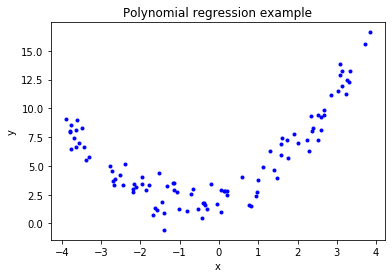

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Generate X

m = 100
X = np.random.uniform(-4, 4, (m,1))

# Generate y

a = 0.7
b = 1
c = 2
y = a * X**2 + b * X + c + np.random.randn(m, 1)

# Plot

plt.plot(X, y, 'b.')
plt.title('Polynomial regression example')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Let's use the normal equations to find the $\theta$ minimizing $J(\theta)$:
$$\mathbf{\theta} = (X^\top X)^{-1}X^\top\mathbf{y}$$

First, we use ordinary linear regression:
$$h_\theta(x) = \theta_0 + \theta_1 x$$
Then, we use polynomial regression with $d=2$:
$$h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$ 

In [2]:
# Hypothesis function

def h(X, theta):
    return X.dot(theta)

# Solve the normal equations

def regress(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

# RMSE (root mean squared error) metric for prediction accuracy

def rmse(y, y_pred):
    return np.sqrt(np.dot((y - y_pred).T, y - y_pred) / m)

#######################
# SIMPLE LINEAR MODEL #
#######################

# Add intercept column of all 1's

X_aug = np.insert(X, 0, 1, axis=1)

# Print first 5 rows of X

print(X_aug[0:5,:])

# Find optimal parameters

theta_slr = regress(X_aug, y)

# Predict y

y_pred_slr = h(X_aug, theta_slr)

print('Linear regression RMSE: %f' % rmse(y, y_pred_slr))

#############################
# POLYNOMIAL MODEL WITH d=2 #
#############################

# Add constant column and x^2 column

X_aug = np.insert(X, 0, 1, axis=1)
X_aug = np.insert(X_aug, 2, X[:,0]**2, axis=1)

# Print first 5 rows of X

print(X_aug[0:5,:])

# Find optimal parameters 

theta_pr = regress(X_aug, y)

# Predict y 

y_pred_pr = h(X_aug, theta_pr)

print('Polynomial regression RMSE: %f' % rmse(y, y_pred_pr))


[[ 1.          2.67696363]
 [ 1.         -1.94885055]
 [ 1.         -2.51989847]
 [ 1.          3.3308905 ]
 [ 1.          0.19732499]]
Linear regression RMSE: 3.269976
[[ 1.          2.67696363  7.16613427]
 [ 1.         -1.94885055  3.79801848]
 [ 1.         -2.51989847  6.34988829]
 [ 1.          3.3308905  11.09483154]
 [ 1.          0.19732499  0.03893715]]
Polynomial regression RMSE: 0.986709


We see that the degree 2 polynomial fit is much better, reducing average error from 3.22 to 0.96.

Here's a plot of the predictions vs. observed data:


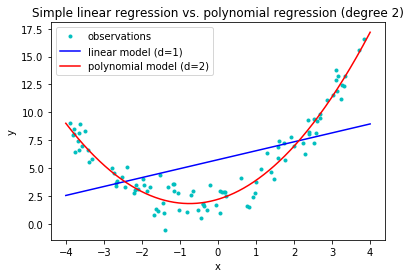

In [3]:
# Plot X, y, and the two regression models

def get_predictions(x, theta):
    x = np.array([x]).T
    x = np.insert(x, 0, 1, axis=1)
    while(x.shape[1] < theta.shape[0]):
        x = np.insert(x, x.shape[1], x[:,1] * x[:,-1], axis=1)
    y = h(x, theta)
    return y

x_series = np.linspace(-4, 4, 1000)
y_series_slr = get_predictions(x_series, theta_slr)
y_series_pr = get_predictions(x_series, theta_pr)

plt.plot(X[:,0], y, 'c.', label='observations')
plt.plot(x_series, y_series_slr, 'b-', label='linear model (d=1)')
plt.plot(x_series, y_series_pr, 'r-', label='polynomial model (d=2)')
plt.title('Simple linear regression vs. polynomial regression (degree 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Besides RMSE, let's also get the $R^2$ for our two models. Recall
\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}


In [4]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

print('Fit of simple linear regression model: %.4f' % r_squared(y, y_pred_slr))
print('Fit of polynomial regression model: %.4f' % r_squared(y, y_pred_pr))


Fit of simple linear regression model: 0.2398
Fit of polynomial regression model: 0.9308


Another useful analysis is to plot histograms of each model's residuals: 

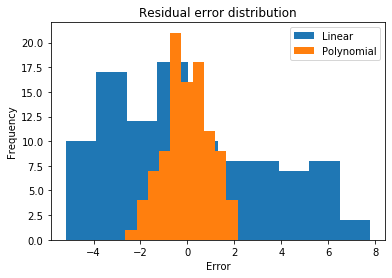

In [5]:
# Plot distribution of residual error for each model

err_slr = y - y_pred_slr
err_pr = y - y_pred_pr

plt.hist(err_slr, bins=10, label = 'Linear')
plt.hist(err_pr, bins=10, label = 'Polynomial')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Residual error distribution')
plt.legend()
plt.show()

The residual plot shows clearly how much better the polynomial model is than the linear model.

## Example 2

Next, let's model some monthly sales data from Kaggle using polynomial regression with varying degree.

We will observe the effects of varying the degree of the polynomial regression fit on the prediction accuracy.

However, as models become more complex, we will encounter the issue of *overfitting*, in which a too-powerful model starts to model the noise in the specific
training set rather than the overall trend.

To ensure that we're not fitting the noise in the training set, we will split the data into seaparte train and test/validation datasets.
The training dataset will consist of 60% of the original observations, and the test dataset will consist of the remaining 40% of the observations.

For various polynomial degrees, we'll estimate optimal parameters $\theta$, then we'll use the test dataset to measure accuracy of the optimized model.

In [6]:
# Import CSV

data = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str);

# Extract headers

headers = data[0,:];
print("Headers:", headers)

# Extract raw data

data = np.array(data[1:,:], dtype=float);

# Extract y column from raw data

y_index = np.where(headers == 'sale amount')[0][0];
y = data[:,y_index];

# Extract x column (just the month) from raw data

x_index = np.where(headers == 'month')[0][0];
X = data[:,x_index];
m = X.size
n = 1
X = X.reshape(m, n)

print('Extracted %d monthly sales records' % m)


Headers: ['year' 'month' 'sale amount']
Extracted 240 monthly sales records


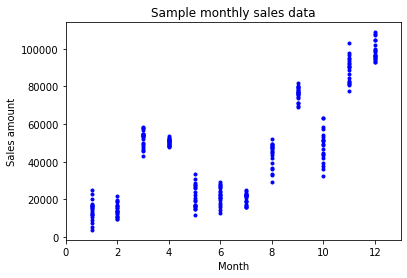

In [7]:
# Plot the data

plt.plot(X, y, 'b.')
plt.xlim(0, 13)
plt.xlabel('Month')
plt.ylabel('Sales amount')
plt.title('Sample monthly sales data')
plt.show()


In [8]:
# Partion data into training and test datasets

idx = np.arange(0,m)
random.shuffle(idx)

percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]
X_train = data[train_idx,1:y_index];
X_test = data[test_idx,1:y_index];

y_train = data[train_idx,y_index];
y_test = data[test_idx,y_index];


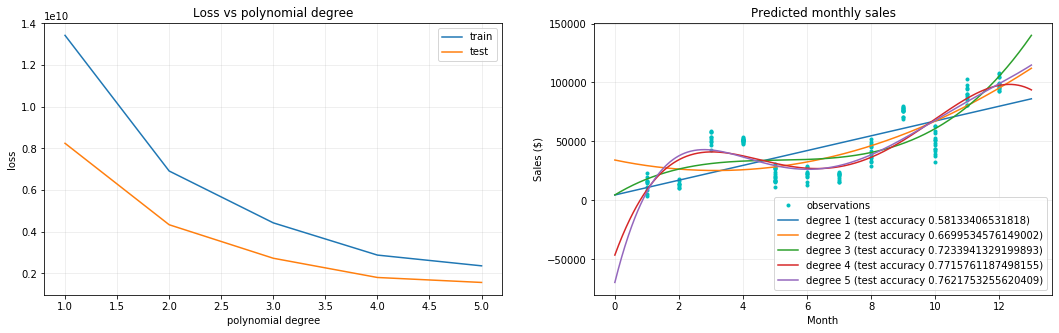

In [9]:
# Cost function normalized by number of examples

def J(theta,X,y):
    return 1 / 2 / X.shape[1] * (h(X,theta)-y).T.dot(h(X,theta)-y)

# Get design matrix for polynomial model of degree d

def x_polynomial(x, d):
    a = np.ones((x.shape[0], 1))    
    for i in range(d):
        a = np.concatenate((a,x**(i+1)), axis = 1)
    return a

# Build models of degree 1 to max_degree

max_degree = 5

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regress(Xi_train, y_train)    
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
    # Plot
    
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

Take some time to undserstand the code. Depending on your random test/train split, you should see that training loss falls as the degree of the polynomial increases.
However, you may observe at some point that test loss starts to increase, and you may see some very strange behavior of the model function beyond the range 1-12.
If not, go ahead and increase the variable `max_degree` until you see an increase in test loss. This is the phenomenon of overfitting!

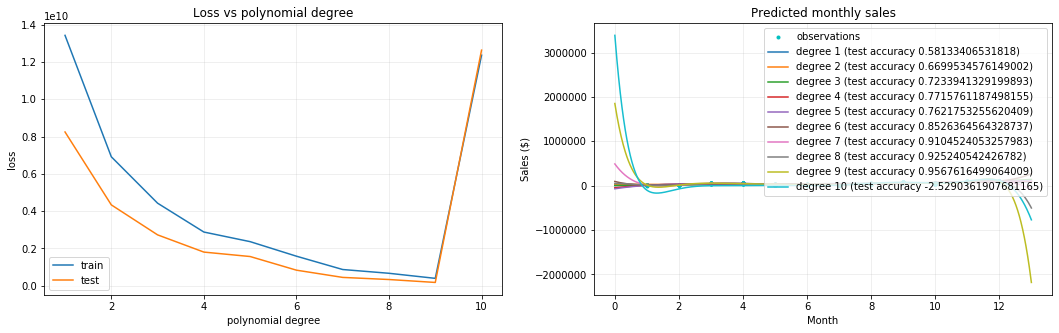

In [11]:
# Build models of degree 1 to max_degree

max_degree = 10

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regress(Xi_train, y_train)    
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
    # Plot
    
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

Here we see significant drop in loss and increase in accuracy while increasing the degree but once we reach degree 9 we see accuracy blowing up. Let's see if normalizing our can help us tackle this problem

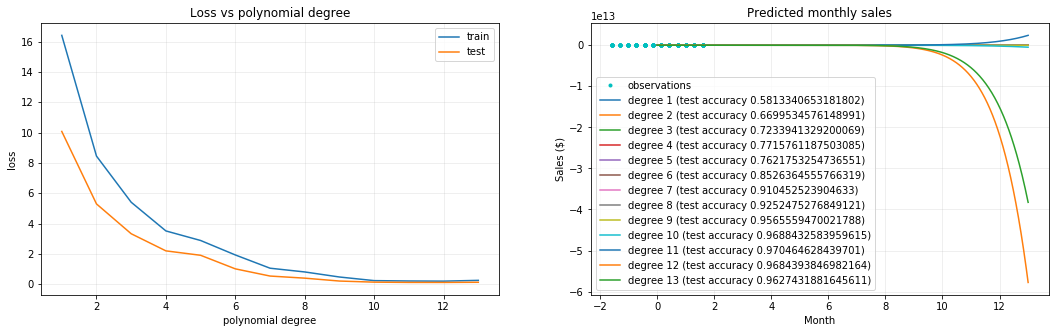

In [14]:

#Normalizing the data for better result
data_norm = (data-np.mean(data, axis=0))/np.std(data, axis=0)

X_norm = data_norm[:,x_index];
y_norm = data_norm[:,y_index];
#Partition normalized data into training and test datasets
X_norm_train = data_norm[train_idx,1:y_index];
X_norm_test = data_norm[test_idx,1:y_index];

y_norm_train = data_norm[train_idx,y_index];
y_norm_test = data_norm[test_idx,y_index];

# Build models of degree 1 to max_degree

max_degree = 13

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_norm_train, y_norm_train, 'c.', label='observations')

for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_norm_train, i)    
    Xi_test = x_polynomial(X_norm_test, i);
    theta = regress(Xi_train, y_norm_train)    
    J_train[i-1] = J(theta, Xi_train, y_norm_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_norm_test)
    
    # Plot
    
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_norm_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

As we see normalization does help in preventing overfitting when we see upto degree 13

## In-lab exercise

During the lab session, you should perform the following exercises:
1. Add the `year` variable from the monthly sales dataset to your simple linear regression model and quantify whether including it improves test set performance. Show
   the observations and predictions in a 3D surface plot.
2. Develop polynomial regression models of degree 2 and 3 based on the two input variables. Show results as 3D surface plots and discuss whether you observe overfitting
   or not.
   



In [15]:
# Solution for lab assignment 1
raw_data = np.genfromtxt('MonthlySales_data.csv',delimiter = ',', dtype=str);
headers = raw_data[0,:];
data = np.array(raw_data[1:,:], dtype=float);

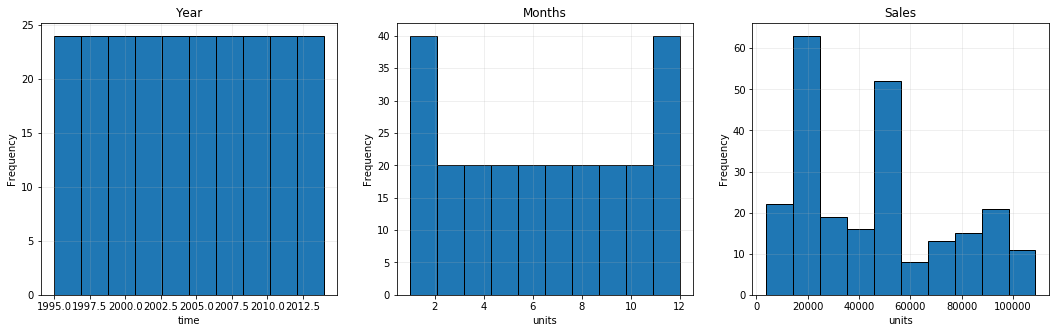

In [16]:
# Visualise the distribution of independent and dependent variables
'''Create subplots in 1 row and 3 columns'''
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

plt1.hist(data[:,0], label='Year', edgecolor='black')
plt1.set_title('Year')
plt1.set_xlabel('time')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

plt2.hist(data[:,1], label='Months', edgecolor='black')
plt2.set_title('Months')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

plt3.hist(data[:,2], label='Sales', edgecolor='black')
plt3.set_title('Sales')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

In [17]:
# Standardize or normalized the data
data_norm = (data-np.mean(data, axis = 0))/np.std(data, axis = 0)

In [18]:
# Extract y from data

y_label = 'sale amount';
y_index = np.where(headers == y_label)[0][0];
y = data_norm[:,y_index];

# Extract x from data

X = data_norm[:,0:y_index];

# Insert column of 1's for intercept column

X = np.insert(X, 0, 1, axis=1)
m = X.shape[0]
n = X.shape[1]

In [20]:
# Optimize the parameters using gradient descent

def h(X,theta):
    return X.dot(theta)

#cost function
def cost(theta, X, y):
    return (h(X, theta) - y).T.dot(h(X, theta) - y)/2

# Gradient of cost function

def gradient(X, y, theta):
    grad = X.T.dot(h(X, theta) - y)
    return grad

def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)
theta_initial = np.zeros((X.shape[1],1))
alpha = 0.0005
iterations = 10000
theta, cost, grad = gradient_descent(X,np.array([y]).T,theta_initial,alpha,iterations)
print('Theta values ', theta)

Theta values  [[-9.80882042e-17]
 [ 1.35716164e-02]
 [ 7.47717631e-01]]


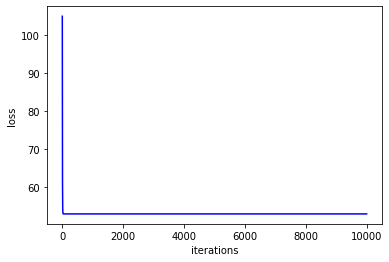

In [21]:
# Visualize the loss
x_loss = np.arange(0,iterations,1)

plt.plot(x_loss, cost, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [22]:
# Goodness of fit
y_predicted =  h(X,theta)
r_square = 1 - np.square(y - y_predicted.T).sum()/np.square(y - y.mean()).sum()
print(r_square)

0.5592658451380919


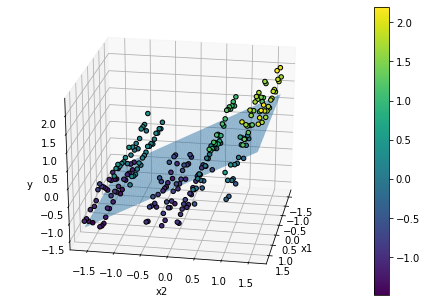

In [23]:
# Compute mean and standard deviation of data

sigma = np.array(np.std(data,axis=0))
mu = np.array(np.mean(data,axis=0))
# De-normalize y
y_predicted =  np.round(h(X, theta) * sigma[2] + mu[2])

# 3D plot of standardized or normalized data

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,1],X[:,2],y,edgecolors='black',c=data_norm[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))
X2 = np.linspace(min(X[:,2]), max(X[:,2]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)

yy = (theta[0] + theta[1]*xx1.T + theta[2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
plt.show()

The resulting goodness of fit using linear regression model is less than in compared to polynomial regression.

3D plot: Polynomial degree 2 



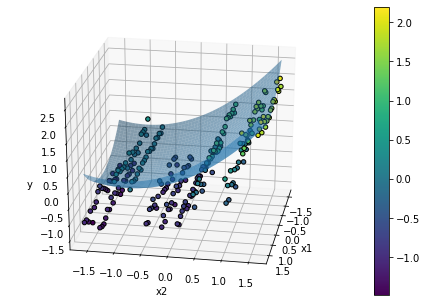

3D plot: Polynomial degree 3 



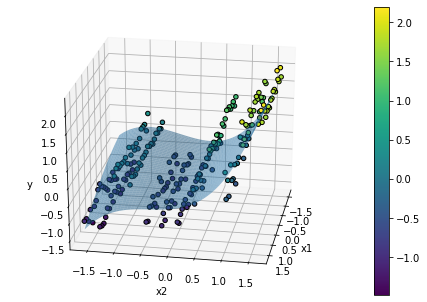

In [30]:
# Solution for lab assignment 2

# Partion data into training and test datasets

X = data_norm[:,0:y_index];
m = X.shape[0]

idx = np.arange(0,m)
random.shuffle(idx)

percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]

X_train = data_norm[train_idx,0:y_index];
X_test = data_norm[test_idx,0:y_index];
y_train = data_norm[train_idx,y_index];
y_test = data_norm[test_idx,y_index];

#############################
# POLYNOMIAL MODEL WITH d=2 #
#############################

max_degree = 2

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss


for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regress(Xi_train, y_train)    
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
# 3D plot
print("3D plot: Polynomial degree 2","\n")
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
# plot observation
p = ax.scatter(X[:,0],X[:,1],y,edgecolors='black',c=data_norm[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
X1 =np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X2 =np.linspace(min(X[:,1]), max(X[:,1]), len(y))
xx1,xx2 = np.meshgrid(X1,X2) # x,y axis
#predicted Y
yy=(theta[0]+theta[1]*xx1.T+theta[2]*xx2+theta[3]*(xx1*xx2)+theta[4]*(xx2**2+xx1**2))
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
plt.show()

#############################
# POLYNOMIAL MODEL WITH d=3 #
#############################

max_degree = 3

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss


for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regress(Xi_train, y_train)    
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
# 3D plot
print("3D plot: Polynomial degree 3","\n")
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
# plot observation
p = ax.scatter(X[:,0],X[:,1],y,edgecolors='black',c=data_norm[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
X1 =np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X2 =np.linspace(min(X[:,1]), max(X[:,1]), len(y))
xx1,xx2 = np.meshgrid(X1,X2) # x,y axis
#predicted Y
yy=(theta[0]+theta[1]*(xx1+xx2).T+theta[2]*xx1*xx2+theta[3]*xx1**2+theta[4]*xx2**2+theta[5]*xx2*xx1**2+theta[6]*xx2**3)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
plt.show()

For polynomial degree above 2, we do observer overfitting

## Take-home exercise

Using the dataset you played with for the take-home exercise in Lab 01, perform the same analysis. You won't be able to visualize the model well, as you will have more
than two inputs, but try to give some idea of the performance of the model visually. Also, depending on the number of variables in your dataset, you may not be able to
increase the polynomial degree beyond 2. Discuss whether the polynomial model is better than the linear model and whether you observe overfitting.

## To turn in

Before the next lab, turn in a brief report in the form of a Jupyter notebook documenting your work in the lab and the take-home exercise, along with your observations
and discussion.

###### The dataset is from Kaggle: 
https://www.kaggle.com/farhanmd29/50-startups

In this exercise, we will use Profit as target variable which needs to be predicted, R&D Spending, Administration Spending and Marketing Spending

In [32]:
import pandas as pd

# Import csv data and separate the headers
data = pd.read_csv('50_Startups.csv')

# Filter out unwanted columns
wanted_columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
selected_features = [column in wanted_columns for column in data.columns]

df = data.loc[:, selected_features]

headers = np.array(df.columns)

In [33]:
# Normalizing dataset
df_norm = (df-np.mean(df, axis = 0))/np.std(df, axis = 0)

data_norm = df_norm.values

# Extract y
y_index = np.where(headers == 'Profit')[0][0]
y = data_norm[:, y_index]

# Extract x
X = data_norm[:, 0:y_index]
m = X.shape[0]

print('Successfully extracted {} records.'.format(m))

Successfully extracted 50 records.


In [34]:
# Splitting training and test set
idx = np.arange(0,m)
random.shuffle(idx)

percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:m+1]
X_train = data_norm[train_idx,0:y_index];
X_test = data_norm[test_idx,0:y_index];

y_train = data_norm[train_idx,y_index];
y_test = data_norm[test_idx,y_index];

print(X_train)

[[ 4.60720127e-01  8.55666318e-01  5.91016724e-01]
 [-2.76958231e-01  1.13055391e+00 -1.01441945e+00]
 [ 1.24505666e+00  8.71980011e-01  9.32185978e-01]
 [ 3.53702028e-02  8.21717916e-01 -6.35835495e-01]
 [ 1.55478369e+00 -9.63646307e-02  1.42221024e+00]
 [ 2.79441650e-01  1.15983657e+00 -1.74312698e+00]
 [ 1.34006641e+00  9.32147208e-01 -6.88149930e-01]
 [-7.73820359e-01 -1.38312156e+00 -2.97583276e-01]
 [-1.99311688e-01  6.56489139e-01 -6.03516725e-01]
 [ 1.75436374e+00 -7.28257028e-01  1.62652767e+00]
 [-4.01128925e-01 -6.59324033e-01  2.98172434e-02]
 [ 1.50493720e+00 -1.07991935e+00  1.28152771e+00]
 [-6.00682122e-01  1.31053525e+00 -1.87861793e-03]
 [ 1.27980001e+00 -7.76239071e-01  1.25421046e+00]
 [ 4.43259872e-01  2.15449064e-01  3.20617441e-01]
 [-1.17717755e+00 -1.99727037e+00 -2.12784866e-01]
 [-1.78608540e-01  1.14245677e+00 -8.58133663e-01]
 [-9.91570153e-01  2.05924691e-01 -8.17625734e-02]
 [-1.62236202e+00  5.07721876e-01 -1.74312698e+00]
 [ 5.57260867e-02 -2.69587651e-

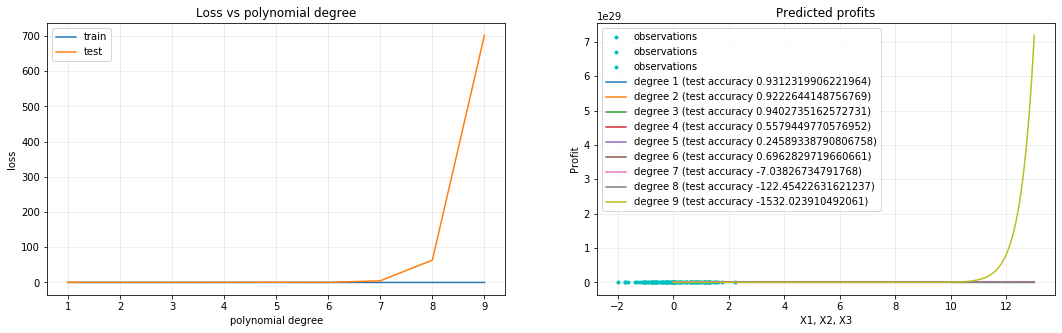

In [35]:
# Let's try building polynomial regression model for above 
# We will consider max_degree = 9

# Build models of degree 1 to max_degree

max_degree = 9

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);
    theta = regress(Xi_train, y_train)    
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
    # Plot
    x_series = np.linspace(0, 13, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt2.set_title('Predicted profits')
plt2.set_xlabel('X1, X2, X3')
plt2.set_ylabel('Profit')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()

The accuracy goes on increasing until we reach degree 3. As we go for degree 4 we can observe a slight a decrease in accuracy. The overfitting issue is more obvious as we increase our polynomial degree after degree 7